<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
1. Proses algoritma KNN :
1) Menentkan jumlah tetangga terdekat (Neighbors) yang disimbolkan dengan huruf K. Harus bilangan bulat positif dan disarankan bilangan ganjil. pemilihan nilai K yang optimal juga dapat memengaruhi performa model KNN.
2) Menghitung jarak dari setiap data latih (train) dalam dataset, dapat berupa jarak euclidean, manhattan dan lainnya.
3) Mengidentifikasi K yang memiliki jarak terdekat dengan data yang akan diprediksi.
4) Klasifikasi dan prediksi. Proses ini akan menentukan kelas mayoritas dari K tetangga terdekat yang akan dijadikan acuan untuk mengklasifikasi data yang akan diuji yang disebut sebagai hasil prediksi.
Jadi, dapat disimpulkan KNN melihat tetangga terdekat untuk membuat prediksi berdasarkan apa yang sudah terjadi sebelumnya. Semakin dekat tetangga, maka prediksi akan semakin mirip dengan apa yang telah dipelajari sebelumnya.

2. Kekurangan algoritma KNN
- Sangat bergantung pada penentuan nilai parameter K.
- Tidak Efektif pada Data Berdimensi Tinggi.
- Sensitif terhadap outliers.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

Uniform Scores:
0.6471428571428571
0.6471428571428571
0.6676190476190478
0.6671428571428571
0.71
0.6961904761904761
0.7176190476190476
0.7314285714285715
0.7033333333333333
0.7104761904761904
0.7171428571428571
0.7314285714285714
0.7247619047619047
0.7314285714285714
0.7457142857142857
0.7457142857142857
0.7385714285714285
0.7457142857142857
0.7242857142857143
Distance Scores:
0.7661904761904761
0.7114285714285714
0.7104761904761905
0.7176190476190477
0.730952380952381
0.7461904761904762
0.7457142857142858
0.7104761904761905
0.7242857142857144
0.7242857142857144
0.7242857142857144
0.731904761904762
0.7247619047619048
0.731904761904762
0.7385714285714287
0.7385714285714287
0.7385714285714287
0.7385714285714287
0.7457142857142858


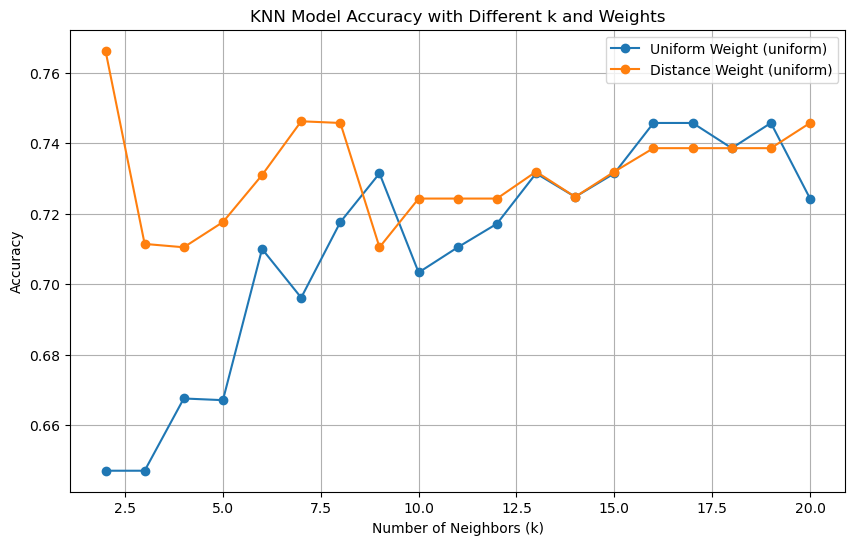

In [13]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['class'])

# Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

K = list(range(2, 21))
weights = ['uniform', 'distance']

# Lists to store accuracy for each combination of k and weights
score_uniform = []
score_distance = []

# Looping with different k and weights values
for weight in weights:  # Change this line from weights_option to weights
    scores = []
    for k in K:
        Class_knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric='minkowski', p=2)
        Class_knn.fit(X_train, y_train)
        y_pred_knn = Class_knn.predict(X_test)
        
        # Accuracy
        accuracies = cross_val_score(estimator=Class_knn, X=X_train, y=y_train, cv=10)
        a = accuracies.mean()
        scores.append(a)

    if weight == 'uniform':
        score_uniform.append(scores)
    elif weight == 'distance':
        score_distance.append(scores)

flat_uniform_scores = np.array(score_uniform).flatten()
flat_distance_scores = np.array(score_distance).flatten()

print('Uniform Scores:')
for score in flat_uniform_scores:
    print(score)
    
print('Distance Scores:')
for score in flat_distance_scores:
    print(score)


# Plotting
plt.figure(figsize=(10, 6))
for i, weight in enumerate(weights):
    if i < len(score_uniform):
        plt.plot(K, score_uniform[i], label=f'Uniform Weight ({weight})', marker='o')
        plt.plot(K, score_distance[i], label=f'Distance Weight ({weight})', marker='o')

plt.title('KNN Model Accuracy with Different k and Weights')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [1]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [5]:
X

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00],
       [1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00],
       [3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00],
       [2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00],
       [4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00],
       [8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00],
       [8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01],
       [1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00],
       [9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00],
       [6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00],
       [9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00],
       [1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00],
       [2.87775339e+00, 1.30028572e+00, 1.93669579e-01, 6.78835533e+00],
       [2.11628116e+00, 2.65546659e+00, 4.91573159e

In [3]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data
model.fit(X, y)

# Menampilkan parameter koefisien
print("Parameter Koefisien (Slope): ", model.coef_)

# Menampilkan intercept
print("Intercept: ", model.intercept_)

Parameter Koefisien (Slope):  [ 1.5 -5.   9.  10. ]
Intercept:  0.5000000016247412
